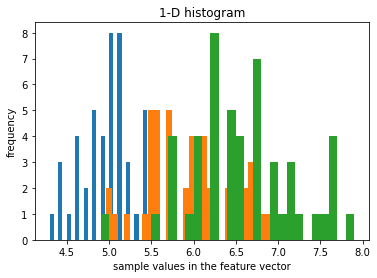

In [1]:
# Q.2.a
import numpy as np
import pandas as pd        
import xlrd
from matplotlib import pyplot as plt
from scipy.stats import norm

data=pd.read_excel('classification_datasets/Iris_Dataset_3/irisdata.xls')
a=list(data.columns.values)
b=[]
data=data.values.tolist()
b.append(a)
for i in range(0,49): # b list contains the samples belonging to 1st class
    b.append(data[i][0:4])
del b[0][4] , a       
c=[]
for i in range(49,99):
    c.append(data[i][0:4]) # c list contains all the samples belonging to the 2nd class
d=[]
for i in range(99,149):
    d.append(data[i][0:4]) # d list contains all the samples belonging to the 3rd class       
def one_d(a):#function for plotting histograms for all the classes, a ranging from
    x1=[]#0 to 3 represents the feature used
    for i in range(0,len(b)):# for the 1st class
        x1.append(b[i][a])

    (y1b,x1b,g)=plt.hist(x1,bins=30,histtype='stepfilled')    
    x2=[]  
    for i in range(0,len(c)):#for the 2nd class 
        x2.append(c[i][a])
    (y1c,x1c,g)=plt.hist(x2,bins=30,histtype='stepfilled')
    x3=[]
    for i in range(0,len(d)):#for the 3rd class
        x3.append(d[i][a])
    (y1d,x1d,g)=plt.hist(x3,bins=30,histtype='stepfilled')
    plt.xlabel('sample values in the feature vector')
    plt.ylabel('frequency')
    plt.title('1-D histogram')
    
    return x1, x2, x3, y1b,x1b,y1c,x1c,y1d,x1d
(x1,x2,x3,y1b,x1b,y1c,x1c,y1d,x1d)=one_d(0)# the first feature is used as default

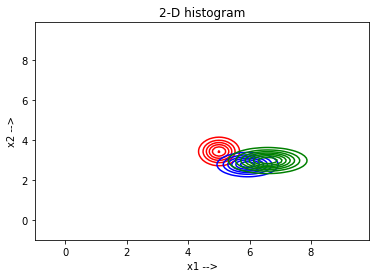

In [2]:
from scipy.stats import multivariate_normal
def two_d(f,g):
    x1f=[]# for the 1st feature
    x1g=[]#for the 2nd feature
    for i in range(0,len(b)):#for the 1st class
        x1f.append(b[i][f])
        x1g.append(b[i][g])
    x1f=np.asarray(x1f,dtype='float')
    x1g=np.asarray(x1g,dtype='float')
    m1=np.array([np.mean(x1f),np.mean(x1g)],dtype='float')
    std1=np.array([np.std(x1f),np.std(x1g)],dtype='float')
    x, y = np.mgrid[-1:10:0.1, -1:10:0.1]
    pos=np.empty(x.shape + (2,))
    pos[:,:,0]=x
    pos[:,:,1]=y
    rv1=multivariate_normal(m1,[[std1[0]**2,0],[0,std1[1]**2]])
    plt.contour(x,y,rv1.pdf(pos),colors='red')
    
    x2f=[]
    x2g=[]
    for i in range(0,len(c)):#for the 2nd class
        x2f.append(c[i][f])
        x2g.append(c[i][g])
    x2f=np.asarray(x2f,dtype='float')
    x2g=np.asarray(x2g,dtype='float')
    m2=np.array([np.mean(x2f),np.mean(x2g)],dtype='float')
    std2=np.array([np.std(x2f),np.std(x2g)],dtype='float')
    x, y = np.mgrid[-1:10:0.1, -1:10:0.1]
    pos=np.empty(x.shape + (2,))
    pos[:,:,0]=x
    pos[:,:,1]=y
    rv2=multivariate_normal(m2,[[std2[0]**2,0],[0,std2[1]**2]])
    plt.contour(x,y,rv2.pdf(pos),colors='blue')
    
    x3f=[]
    x3g=[]
    for i in range(0,len(d)):#for the 3rd class
        x3f.append(d[i][f])
        x3g.append(d[i][g])
    x3f=np.asarray(x3f,dtype='float')
    x3g=np.asarray(x3g,dtype='float')
    m3=np.array([np.mean(x3f),np.mean(x3g)],dtype='float')
    std3=np.array([np.std(x3f),np.std(x3g)],dtype='float')
    x, y = np.mgrid[-1:10:0.1, -1:10:0.1]
    pos=np.empty(x.shape + (2,))
    pos[:,:,0]=x
    pos[:,:,1]=y
    rv3=multivariate_normal(m3,[[std3[0]**2,0],[0,std3[1]**2]])
    plt.contour(x,y,rv3.pdf(pos),colors='green')
    plt.xlabel('x1 -->')
    plt.ylabel('x2 -->')
    plt.title('2-D histogram')
    
    
    return x1f,x1g,x2f,x2g,x3f,x3g,rv1,rv2,rv3
(x1f,x1g,x2f,x2g,x3f,x3g,_,_,_)=two_d(0,1)

In [3]:
# Q.3
from scipy.stats import multivariate_normal
import numpy as np
import pandas as pd        
import xlrd
from matplotlib import pyplot as plt
from scipy.stats import norm
import math
import statistics as stat

data3=pd.read_excel('que3.xlsx')
a=np.array(data3.values)
class_1=a[0:500,:]
class_2=a[500:1000,:]
class_3=a[1000:1500,:]
class_1_train=class_1[0:350,:]
class_1_test=class_1[350:500,:]
class_2_train=class_2[0:350,:]
class_2_test=class_2[350:500,:]
class_3_train=class_3[0:350,:]
class_3_test=class_3[350:500,:]
test=np.concatenate((class_1_test,class_2_test,class_3_test),axis=0)

# y labels to be compared with
g=np.ones((450,1),dtype='int')
g[150:300,0]=2
g[300:450,0]=3

def gauss(x,m1,m2,m3,sigma1,sigma2,sigma3):# returns the class number which belongs to x
    
    const1=1/(2*math.pi*(sigma1[0,0]**0.5)*(sigma1[1,1]**0.5))
    f1=(-0.5)*(np.matmul((x-m1).transpose(),np.matmul(np.linalg.inv(sigma1),(x-m1))))
    g1=const1*f1
    
    const2=1/(2*math.pi*(sigma2[0,0]**0.5)*(sigma2[1,1]**0.5))
    f2=(-0.5)*(np.matmul((x-m2).transpose(),np.matmul(np.linalg.inv(sigma2),(x-m2))))
    g2=const2*f2
    
    const3=1/(2*math.pi*(sigma3[0,0]**0.5)*(sigma3[1,1]**0.5))
    f3=(-0.5)*(np.matmul((x-m3).transpose(),np.matmul(np.linalg.inv(sigma3),(x-m3))))
    g3=const3*f3    
    #g1, g2 and g3 are the computed p(x/w1), p(x/w2) and p(x/w3) values
    if max(g1,g2,g3) == g1:
        return 1
    elif max(g1,g2,g3) == g2:
        return 2
    else:
        return 3

accuracy on test data = 99.77777777777777 %


Text(0.5, 1.0, 'contours for Q.3.a, accuracy on test data = 99.77 %')

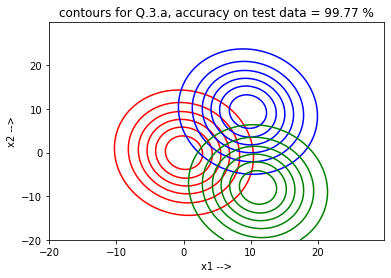

In [4]:
# Q.3.a
# sigma is calculated using all the 1500 datapoints
sigma=np.cov(a.T)
# calculating mean vectors for each class
m1_1=np.mean(class_1_train[:,0]);m1_1=np.reshape(m1_1,(1,1))
m1_2=np.mean(class_1_train[:,1]);m1_2=np.reshape(m1_2,(1,1))
m1=np.concatenate((m1_1,m1_2),axis=0)

m2_1=np.mean(class_2_train[:,0]);m2_1=np.reshape(m2_1,(1,1))
m2_2=np.mean(class_2_train[:,1]);m2_2=np.reshape(m2_2,(1,1))
m2=np.concatenate((m2_1,m2_2),axis=0)

m3_1=np.mean(class_3_train[:,0]);m3_1=np.reshape(m3_1,(1,1))
m3_2=np.mean(class_3_train[:,1]);m3_2=np.reshape(m3_2,(1,1))
m3=np.concatenate((m3_1,m3_2),axis=0)
if test.shape[0] != 2:
    test=test.transpose()
h=np.zeros((450,1),dtype='int')
# checking with test cases
for i in range(0,450):
    h[i,0]=gauss(np.reshape(test[:,i],(2,1)),m1,m2,m3,sigma,sigma,sigma)

count=0
for i in range(0,len(g)):
    if g[i]==h[i]:
        count=count+1
print('accuracy on test data =',float((count/450)*100),'%')

#plotting contours for all classes
m1=m1.tolist()
for i in range(0,len(m1)):
    m1[i]=m1[i][0]
x, y = np.mgrid[-20:30:0.1, -20:30:0.1]
pos=np.empty(x.shape + (2,))
pos[:,:,0]=x
pos[:,:,1]=y
rv1=multivariate_normal(m1,sigma)
plt.contour(x,y,rv1.pdf(pos),colors='red')

m2=m2.tolist()
for i in range(0,len(m1)):
    m2[i]=m2[i][0]
x, y = np.mgrid[-20:30:0.1, -20:30:0.1]
pos=np.empty(x.shape + (2,))
pos[:,:,0]=x
pos[:,:,1]=y
rv2=multivariate_normal(m2,sigma)
plt.contour(x,y,rv2.pdf(pos),colors='blue')

m3=m3.tolist()
for i in range(0,len(m1)):
    m3[i]=m3[i][0]
x, y = np.mgrid[-20:30:0.1, -20:30:0.1]
pos=np.empty(x.shape + (2,))
pos[:,:,0]=x
pos[:,:,1]=y
rv3=multivariate_normal(m3,sigma)
plt.contour(x,y,rv3.pdf(pos),colors='green')
plt.xlabel('x1 -->')
plt.ylabel('x2 -->')
plt.title('contours for Q.3.a, accuracy on test data = 99.77 %')

accuracy = 99.77777777777777 %


Text(0.5, 1.0, 'contours for Q.3.b, accuracy on test data = 99.77 %')

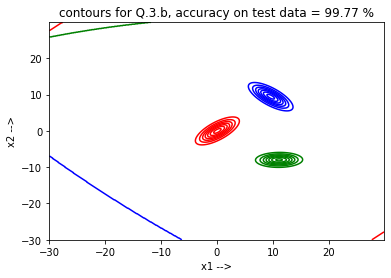

In [5]:
# Q.3.b
# claculating mean and sigma matrices for each class induvidually
m1_1=np.mean(class_1_train[:,0]);m1_1=np.reshape(m1_1,(1,1))
m1_2=np.mean(class_1_train[:,1]);m1_2=np.reshape(m1_2,(1,1))
m1=np.concatenate((m1_1,m1_2),axis=0)

m2_1=np.mean(class_2_train[:,0]);m2_1=np.reshape(m2_1,(1,1))
m2_2=np.mean(class_2_train[:,1]);m2_2=np.reshape(m2_2,(1,1))
m2=np.concatenate((m2_1,m2_2),axis=0)

m3_1=np.mean(class_3_train[:,0]);m3_1=np.reshape(m3_1,(1,1))
m3_2=np.mean(class_3_train[:,1]);m3_2=np.reshape(m3_2,(1,1))
m3=np.concatenate((m3_1,m3_2),axis=0)

sigma1=np.cov(class_1_train.T)

sigma2=np.cov(class_2_train.T)

sigma3=np.cov(class_3_train.T)

if test.shape[0] != 2:
    test=test.transpose()
h=np.zeros((450,1),dtype='int')
#checking with test cases
for i in range(0,450):
    h[i,0]=gauss(np.reshape(test[:,i],(2,1)),m1,m2,m3,sigma1,sigma1,sigma3)

count=0
for i in range(0,len(g)):
    if g[i]==h[i]:
        count=count+1
print('accuracy =',float((count/450)*100),'%')

#plotting contours for all classes
m1=m1.tolist()
for i in range(0,len(m1)):
    m1[i]=m1[i][0]
x, y = np.mgrid[-30:30:0.1, -30:30:0.1]
pos=np.empty(x.shape + (2,))
pos[:,:,0]=x
pos[:,:,1]=y
rv1=multivariate_normal(m1,sigma1)
plt.contour(x,y,rv1.pdf(pos),colors='red')

m2=m2.tolist()
for i in range(0,len(m2)):
    m2[i]=m2[i][0]
x, y = np.mgrid[-30:30:0.1, -30:30:0.1]
pos=np.empty(x.shape + (2,))
pos[:,:,0]=x
pos[:,:,1]=y
rv2=multivariate_normal(m2,sigma2)
plt.contour(x,y,rv2.pdf(pos),colors='blue')

m3=m3.tolist()
for i in range(0,len(m3)):
    m3[i]=m3[i][0]
x, y = np.mgrid[-30:30:0.1, -30:30:0.1]
pos=np.empty(x.shape + (2,))
pos[:,:,0]=x
pos[:,:,1]=y
rv3=multivariate_normal(m3,sigma3)
plt.contour(x,y,rv3.pdf(pos),colors='green')
plt.xlabel('x1 -->')
plt.ylabel('x2 -->')
plt.title('contours for Q.3.b, accuracy on test data = 99.77 %')

accuracy = 99.77777777777777 %


Text(0.5, 1.0, 'contours for Q.3.c, accuracy on test data = 99.77 %')

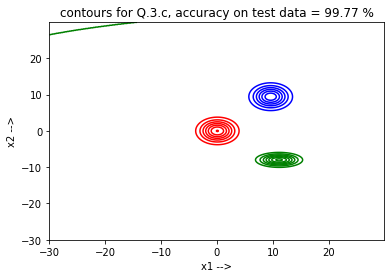

In [6]:
# Q.3.c
# calculating mean vectors
m1_1=np.mean(class_1_train[:,0]);m1_1=np.reshape(m1_1,(1,1))
m1_2=np.mean(class_1_train[:,1]);m1_2=np.reshape(m1_2,(1,1))
m1=np.concatenate((m1_1,m1_2),axis=0)

m2_1=np.mean(class_2_train[:,0]);m2_1=np.reshape(m2_1,(1,1))
m2_2=np.mean(class_2_train[:,1]);m2_2=np.reshape(m2_2,(1,1))
m2=np.concatenate((m2_1,m2_2),axis=0)

m3_1=np.mean(class_3_train[:,0]);m3_1=np.reshape(m3_1,(1,1))
m3_2=np.mean(class_3_train[:,1]);m3_2=np.reshape(m3_2,(1,1))
m3=np.concatenate((m3_1,m3_2),axis=0)

#finding out sigma matrices and converting them into diagonal matrices
sigma1=np.cov(class_1_train.T)
sigma1[0,1]=0;sigma1[1,0]=0

sigma2=np.cov(class_2_train.T)
sigma2[0,1]=0;sigma2[1,0]=0

sigma3=np.cov(class_3_train.T)
sigma3[0,1]=0;sigma3[1,0]=0

if test.shape[0] != 2:
    test=test.transpose()
h=np.zeros((450,1),dtype='int')
#checking with test cases
for i in range(0,450):
    h[i,0]=gauss(np.reshape(test[:,i],(2,1)),m1,m2,m3,sigma1,sigma1,sigma3)

count=0
for i in range(0,len(g)):
    if g[i]==h[i]:
        count=count+1
print('accuracy =',float((count/450)*100),'%')

#plotting contours for all classes
m1=m1.tolist()
for i in range(0,len(m1)):
    m1[i]=m1[i][0]
x, y = np.mgrid[-30:30:0.1, -30:30:0.1]
pos=np.empty(x.shape + (2,))
pos[:,:,0]=x
pos[:,:,1]=y
rv1=multivariate_normal(m1,sigma1)
plt.contour(x,y,rv1.pdf(pos),colors='red')

m2=m2.tolist()
for i in range(0,len(m2)):
    m2[i]=m2[i][0]
x, y = np.mgrid[-30:30:0.1, -30:30:0.1]
pos=np.empty(x.shape + (2,))
pos[:,:,0]=x
pos[:,:,1]=y
rv2=multivariate_normal(m2,sigma2)
plt.contour(x,y,rv2.pdf(pos),colors='blue')

m3=m3.tolist()
for i in range(0,len(m3)):
    m3[i]=m3[i][0]
x, y = np.mgrid[-30:30:0.1, -30:30:0.1]
pos=np.empty(x.shape + (2,))
pos[:,:,0]=x
pos[:,:,1]=y
rv3=multivariate_normal(m3,sigma3)
plt.contour(x,y,rv3.pdf(pos),colors='green')
plt.xlabel('x1 -->')
plt.ylabel('x2 -->')
plt.title('contours for Q.3.c, accuracy on test data = 99.77 %')